In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from skimage.metrics import structural_similarity

In [2]:
def calculate_ssim(ground_truth, prediction, mask):
    # Compute SSIM between two images only in the masked region
    # masked_ground_truth = ground_truth * mask
    # score_baseline = structural_similarity(masked_ground_truth, ground_truth,  data_range=np.max(ground_truth) - np.min(ground_truth))
    ground_truth = ground_truth[np.where(mask==0)]
    prediction = prediction[np.where(mask==0)]
    score = structural_similarity(ground_truth, prediction, data_range=np.max(prediction) - np.min(prediction))
    # normalized_score = (score-score_baseline)/(1-score_baseline)
    return score

def calculate_psnr(ground_truth, prediction, mask):
    # Compute PSNR between two images only in the masked region
    ground_truth = ground_truth[np.where(mask==0)]
    prediction = prediction[np.where(mask==0)]
    mse = np.mean((ground_truth - prediction) ** 2)
    if mse == 0:
        return 100
    max_pixel = np.max(prediction)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_rmse(ground_truth, prediction, mask):
    # Compute RMSE between two images only in the masked region
    ground_truth = ground_truth[np.where(mask==0)]
    prediction = prediction[np.where(mask==0)]
    rmse = np.sqrt(np.mean((ground_truth - prediction) ** 2))
    return rmse

In [68]:
data_root = "data/covid-chestxray-dataset/resized/"
mask_root = data_root + "masks/4_holes/"
model_paths = np.sort(glob("checkpoint/model4/finetune/**/g_final.pth", recursive=True))
images = np.sort(glob(data_root + "*.npy"))[-100:]
rmse = {}
# for model_path in model_paths:
#     fakes = np.sort(glob(os.path.dirname(model_path)+"/results/*"))
#     for fake in fakes:
        # im = Image.open(fake)
        # im1 = np.array(im)
        # print(im1)
        # im = im.convert('L')
        # im = np.array(im)

        # np.save(fake.replace(".png", ""), im)
        # os.system(f"rm {fake}")

# for model_path in model_paths:
#     key = os.path.basename(os.path.dirname(model_path))
#     fakes = np.sort(glob(os.path.dirname(model_path)+"/results/*.npy"))
#     rmse[key] = 0
#     for gt, fake, mask in zip(images, fakes, masks):
#         fake = np.load(fake)
#         gt = np.load(gt)
#         mask = np.load(mask)
#         rmse[key] += calculate_rmse(gt, fake, mask)/100

checkpoint/model4/finetune/1000+100/g_final.pth
min pixel value in inpaint:  0.0
max pixel value in inpaint:  0.99609375
min pixel value in gt:  0.0
max pixel value in gt:  0.99609375
max pixel value in diff:  0.11670133471488953


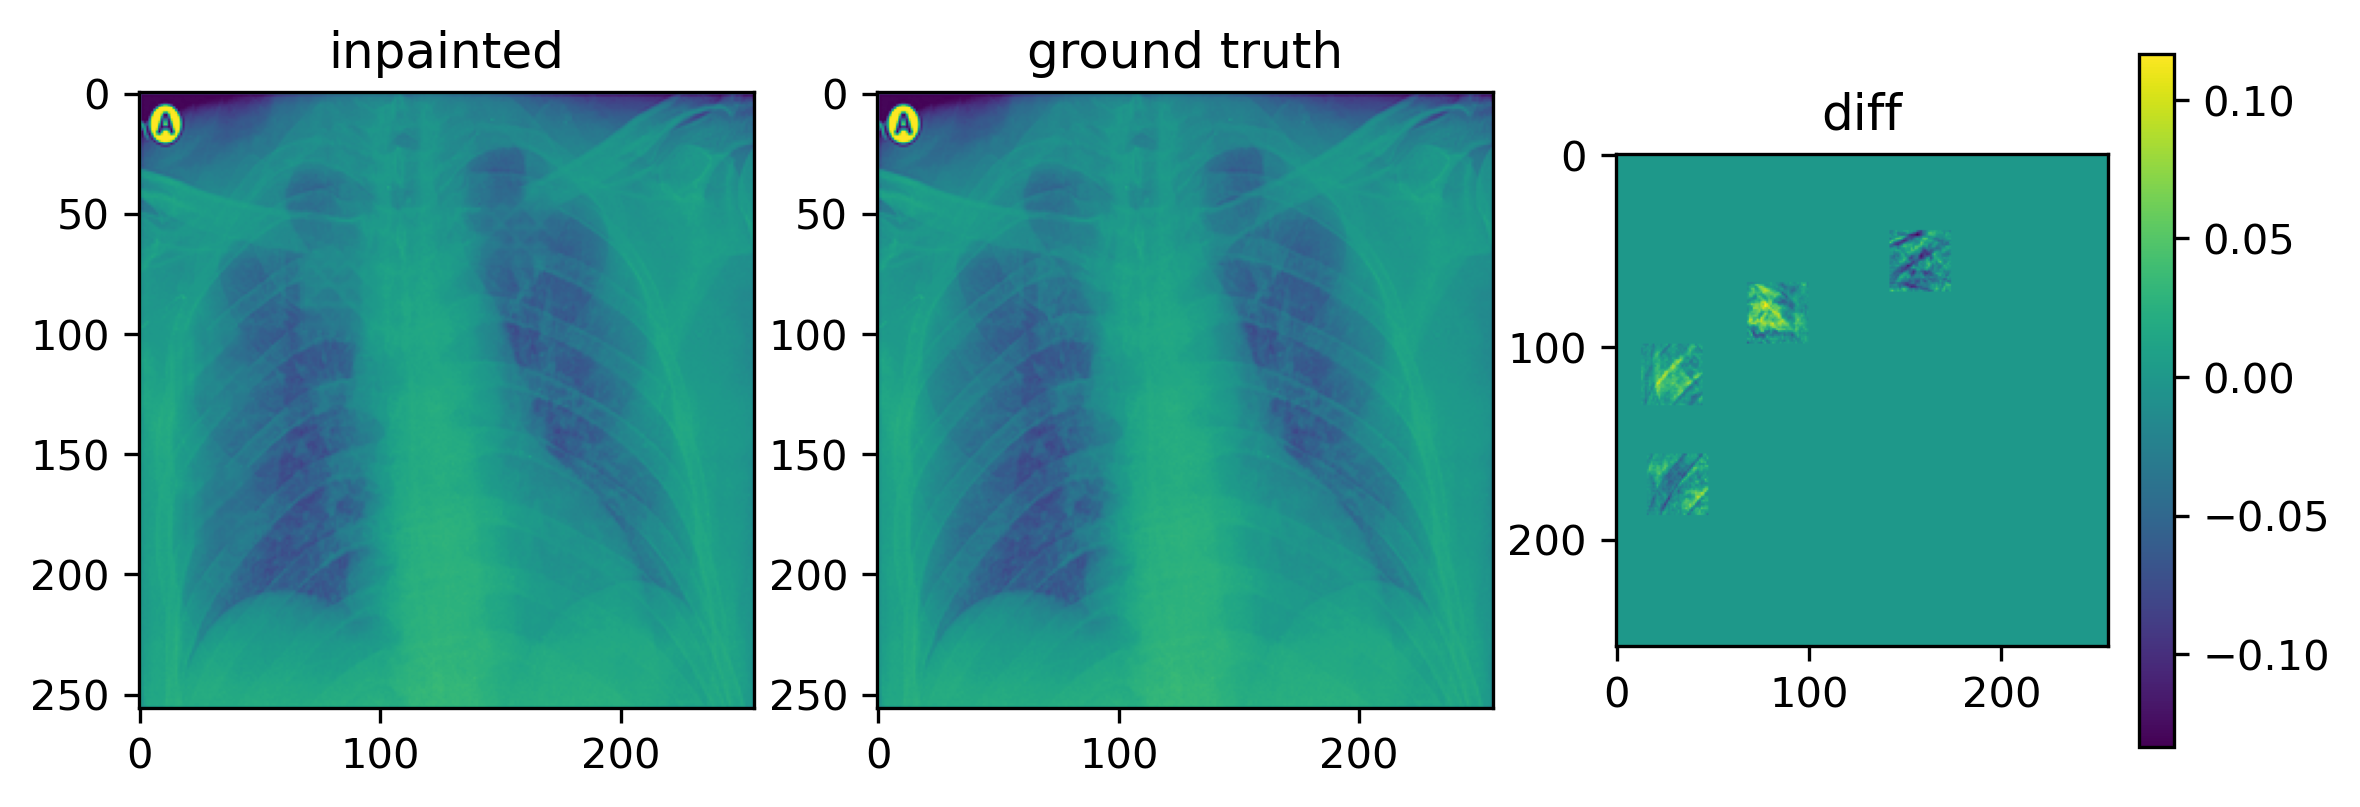

In [73]:
for model_path in model_paths:
    print(model_path)
    model_path = "checkpoint/model4/finetune/8000+800/g_final.pth"
    key = os.path.basename(os.path.dirname(model_path))
    fakes = np.sort(glob(os.path.dirname(model_path)+"/results/img_*.npy"))
    masks = np.sort(glob(os.path.dirname(model_path)+"/results/mask_*.npy"))
    rmse[key] = 0
    for gt, fake, mask in zip(images, fakes, masks):
        fake = np.load(fake)
        gt = np.load(gt)/256
        mask = np.load(mask)[:, :, 0]
        rmse[key] += calculate_rmse(gt, fake, mask)/100
        plt.figure(figsize=(9,3), dpi=300)
        plt.subplot(1,3,1)
        plt.imshow(fake)
        plt.title("inpainted")
        print("min pixel value in inpaint: ", np.min(fake))
        print("max pixel value in inpaint: ", np.max(fake))
        plt.subplot(1,3,2)
        plt.imshow(gt)
        plt.title("ground truth")
        print("min pixel value in gt: ", np.min(gt))
        print("max pixel value in gt: ", np.max(gt))
        plt.subplot(1,3,3)
        plt.imshow((fake-gt))
        plt.title("diff")
        plt.colorbar()
        print("max pixel value in diff: ", np.max((fake-gt)))
        break
    break

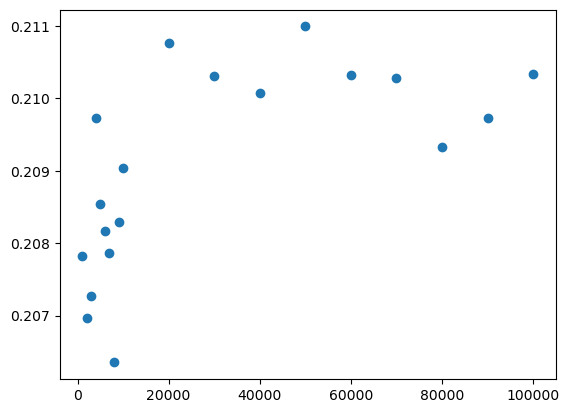

In [72]:
x = np.array([int(x.split("+")[0]) for x in rmse.keys()])
sort = np.argsort(x)
x = x[sort]
y = np.array([float(y) for y in rmse.values()])
y = y[sort]
plt.scatter(x, y)